#Importing libaries and data sets

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[8,6.4]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#I want to redo how I went about my feature selections. The way I did it seems to be off of just what I believe versus a more analytic and strategic approach. So what I'm going to do to fix this will be:

- Find the columns that has over 55% corelation to sale price
- Lets use a heatmap for this and then have each tile show their correlation percentage
- The ones over 55% will be the columns im gonna go with


<AxesSubplot:>

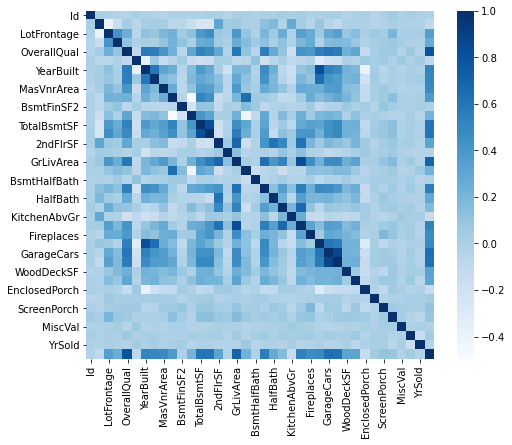

In [34]:
#Heat map shows that majority of columns do not have high correlations
corrmat = train.corr()
sns.heatmap(corrmat, square=True, cmap='Blues')

In [35]:
corr_col = corrmat.index[abs(corrmat['SalePrice']) > 0.55]
corr_col

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

<AxesSubplot:>

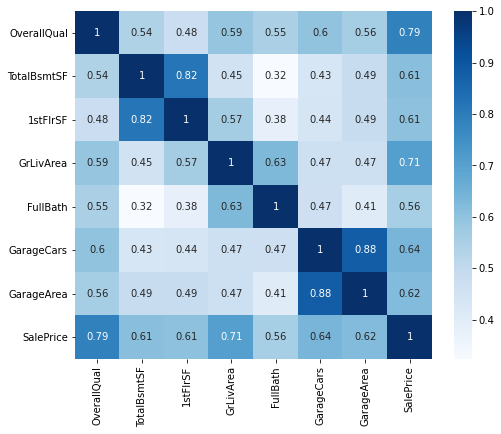

In [36]:
sns.heatmap(train[corr_col].corr(), annot=True, cmap='Blues')

### Based on the correlation shown in the heatmap, the following columns will be used in the ML model due to having a correlation higher than 55%
- OverralQual
- TotalBsmtSF
- 1stFlrSF
- GrLivArea
- FullBath
- GarageCars
- GarageArea

In [37]:
df=train[['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'GarageCars', 'GarageArea', 'SalePrice']]
df

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice
0,7,856,856,1710,2,2,548,208500
1,6,1262,1262,1262,2,2,460,181500
2,7,920,920,1786,2,2,608,223500
3,7,756,961,1717,1,3,642,140000
4,8,1145,1145,2198,2,3,836,250000
...,...,...,...,...,...,...,...,...
1455,6,953,953,1647,2,2,460,175000
1456,6,1542,2073,2073,2,2,500,210000
1457,7,1152,1188,2340,2,1,252,266500
1458,5,1078,1078,1078,1,1,240,142125


#Analyzing Price

In [38]:
train['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

c:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

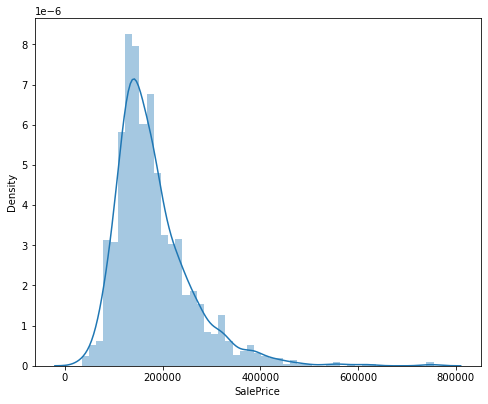

In [39]:
sns.distplot(train['SalePrice'])

Majority of sales prices seem to be around the $150,000 range

In [40]:
# def scatter_plot(x, y, title, xaxis, yaxis, size, cscale):
#     trace = go.Scatter(x=x, y=y, mode='markers', marker=dict(color=y, size=size, showscale=True, colorscale=cscale))
#     layout = go.Layout(hovermode='closest', title=title, xaxis=dict(title=xaxis), yaxis=dict(title=yaxis))
#     fig = go.Figure(data=[trace], layout=layout)
#     return iplot(fig)

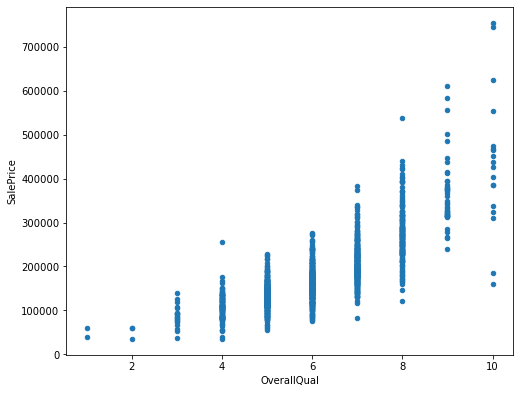

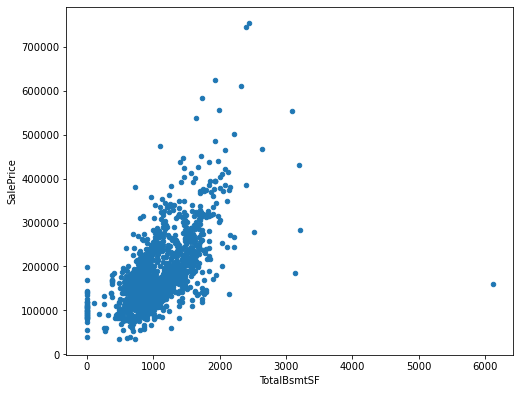

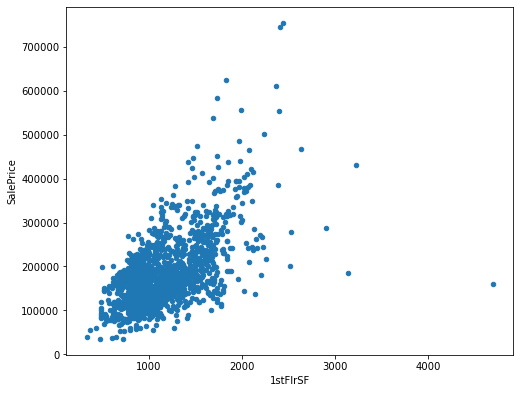

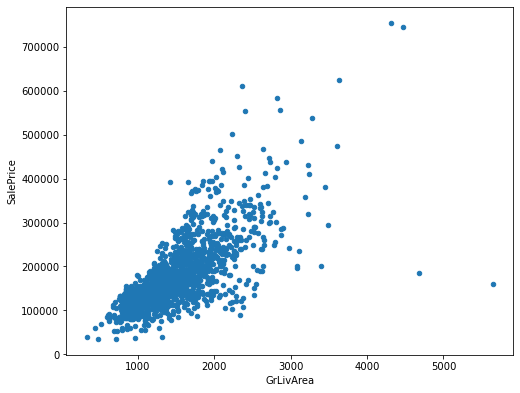

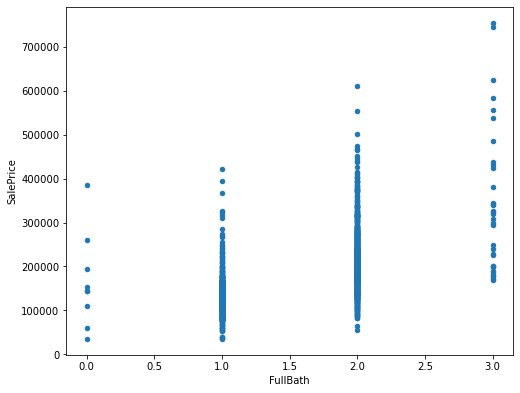

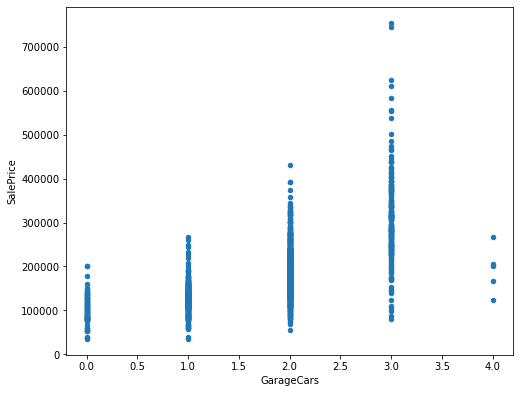

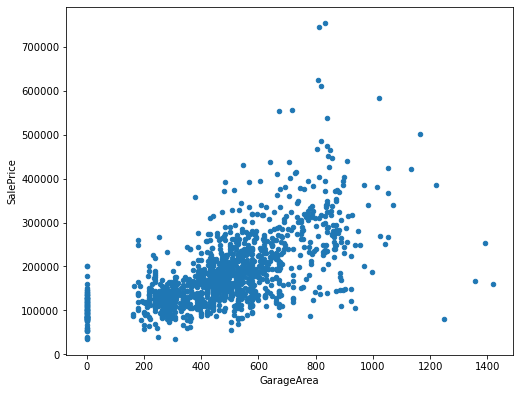

In [41]:
for i in df:
    if i != 'SalePrice':
        df.plot.scatter(x=i, y='SalePrice')

##it does some that the columns do have a linear regression thanks to their high correlation score

In [42]:
df.isnull().sum()
#No missing values

OverallQual    0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
FullBath       0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

In [43]:
#so in this case, for the ML model, Y = SalePrice while X = the other columns
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [44]:
print(x.shape, y.shape)

(1460, 7) (1460,)


In [45]:
y_pred = regressor.predict(x)

In [46]:

#this is not plotible since there's multiple variables
#what I can try to do and need to do next is actually find out about how to do model evaluation
    #rmsc, cross validations, etc
    #we want to be able to split some stuff up and then once I built the model I want to test it on the actual test data to see how accurate I am
    #Assumption of LInear regression look into this
    #One risk of what I done is multicorrelian - This is slightly true as based on the heat might there is high correlation with some of the other attributes
    # I have to look for BIF
    #WHat I started with looking for the high correlation was good
    #https://machinelearningmastery.com/rfe-feature-selection-in-python/
    
#upcoming steps
    #Focus on RFE, and then do feature engineering which is where I make up my features
    #for RFE, do it by hand as much as possible and then go about the algorithm\
    #try another ML model, may SVR*(this is in the udemy course) and elastic net (it does feature selectin for you)
    #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
#multicolinearity and model evaluation are a must for this week


    

##What to get done by 06/20/22 Meeting
- Check for multicolinearity along with cross-validation for my current selections
- Run an RFE to see if the results differ andd why
- Look at other ML algorithms that I can run as well and see their results
- Compare the different models' and evaluate them
- 

<AxesSubplot:>

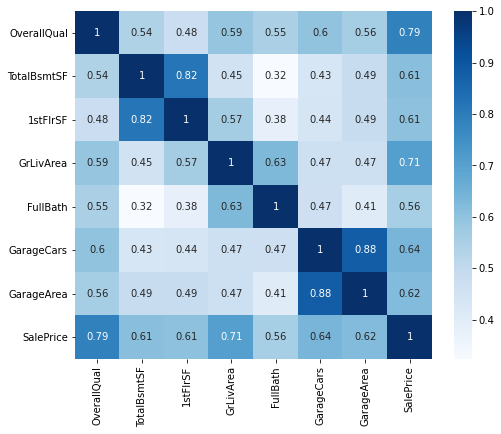

In [47]:
#checking for multicolinearity with my current dataset
sns.heatmap(train[corr_col].corr(), annot=True, cmap='Blues')

Based on my previous heatmap, we can see that some of the other features do have a high correlation amongst each other. I listed those with high correlation to other features that contained a correlation score of .7 or higher
- totalbsmtsf & 1strflrsf
-  garagecars and garagearea

Since only two sets of features out of the whole DF have a high correlation value, I believe this DF should be able to avoid issues dealing with multicolinearity

I will be attempting an RFE(recursive feature elimination) to determine of there are any differences with its results compared to my manual results where I did feature selection based on correlation.

I will also be doing this only on the numerical features, as based on my heatmap the categorical features did not have a high correlation with the sales price

In [48]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
#input split
x = train.drop(columns=['SalePrice','Id'], axis=1).select_dtypes(exclude=['object'])
y = df['SalePrice']
# x.dtypes.value_counts()
# print(x.select_dtypes(include='float64'))
x.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [50]:
#Handling missing values
#I felt it was comfortable and appropriate the simply replace the nulls for with 0 as these columns has low correlation to sale price based on my heatmap. This way the change will only affect the two columns
x[['LotFrontage','GarageYrBlt','MasVnrArea']]= x[['LotFrontage','GarageYrBlt','MasVnrArea']].fillna(0)
x.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [51]:
#https://www.youtube.com/watch?v=vxdVKbAv6as
#applying RFE with decisiontreeclassifier as my estimtor. I chose 7 to select features as in my previous feature selection where I chose with correlation, I ended up with 7 features
#decision tree choose features best it can 
#see if there is a regression base classifier for it
#the idea of RFE to get a high lvl insight to help us what we need to do
#possibly redo the RFE without the influence of the corr heat map
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=7)
rfe.fit(x,y)


RFE(estimator=DecisionTreeClassifier(), n_features_to_select=7)

In [52]:
for i, col in zip(range(x.shape[1]), x.columns):
    if rfe.support_[i] != False:
        print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")
temp = pd.Series(rfe.support_,index = x.columns)
selected_features_rfe = temp[temp==True].index
# df.info()

LotArea selected=True rank=1
YearBuilt selected=True rank=1
BsmtUnfSF selected=True rank=1
TotalBsmtSF selected=True rank=1
GrLivArea selected=True rank=1
GarageYrBlt selected=True rank=1
GarageArea selected=True rank=1


Comparing correlations of RFE chosen features to price to the features chosen based on correlation heat map

In [53]:
RFE_features = train[['SalePrice','LotArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'GarageYrBlt',
       'GarageArea', 'MoSold']]

#RFE chosen features
def RFE_scatter_plot(): 
       for i in RFE_features:
              if i != 'SalePrice':
                     RFE_features.plot.scatter(x=i,y='SalePrice')
                     
#Correlation heat map chosen features
def corr_scatter_plot():
       for i in df:
        if i != 'SalePrice':
              df.plot.scatter(x=i, y='SalePrice')


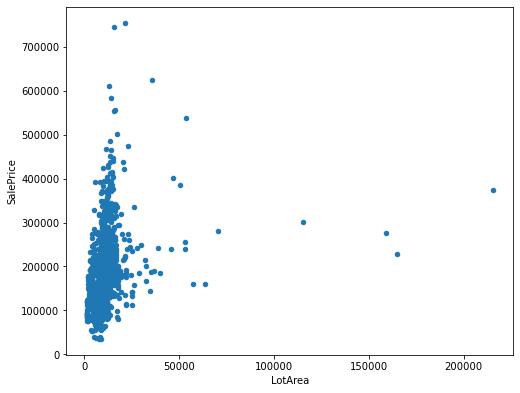

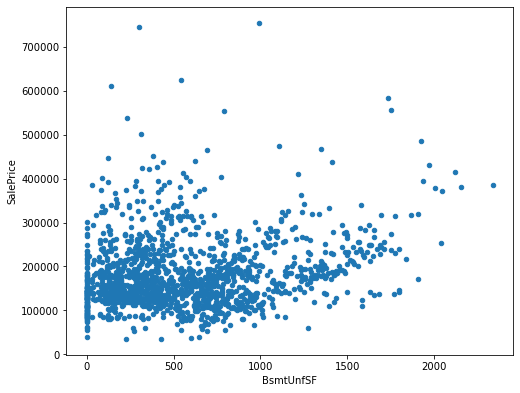

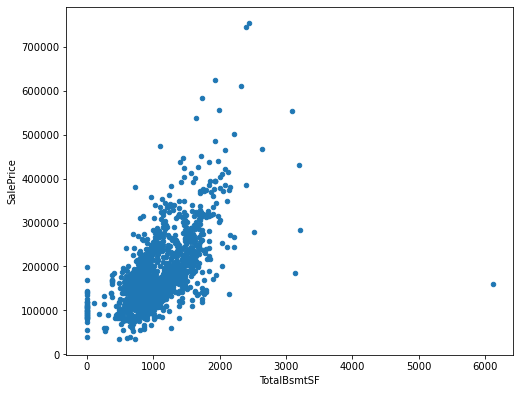

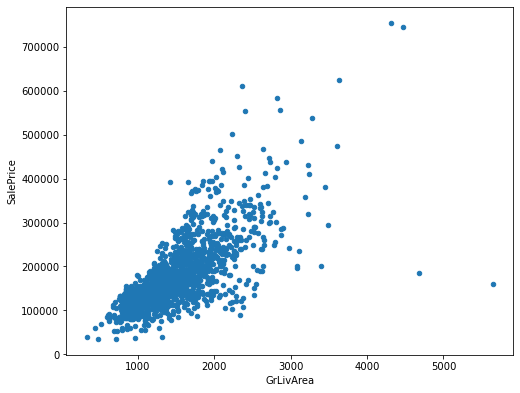

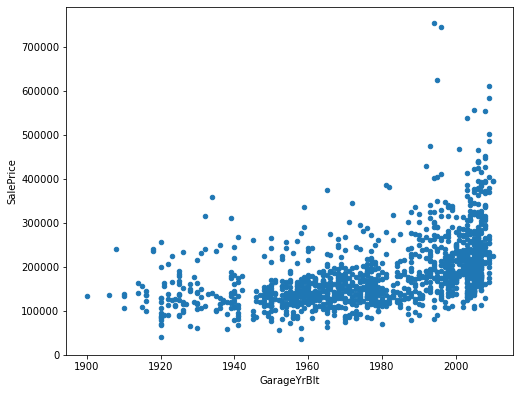

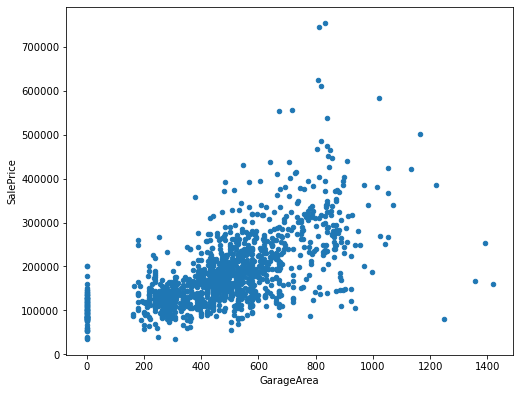

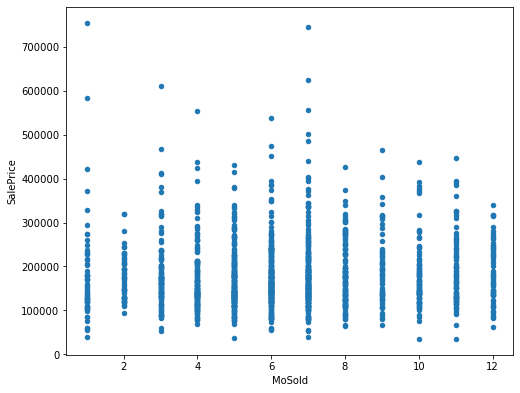

In [54]:
RFE_scatter_plot()

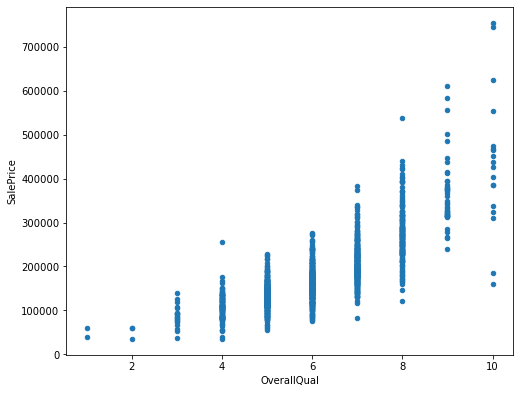

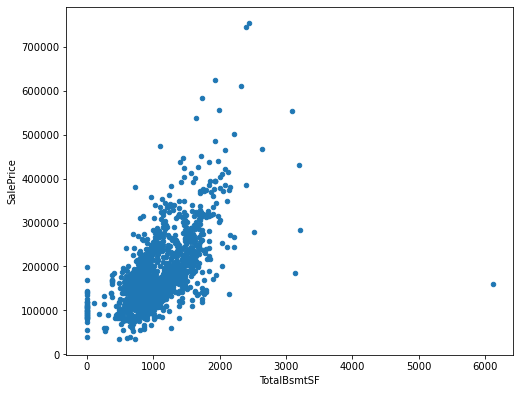

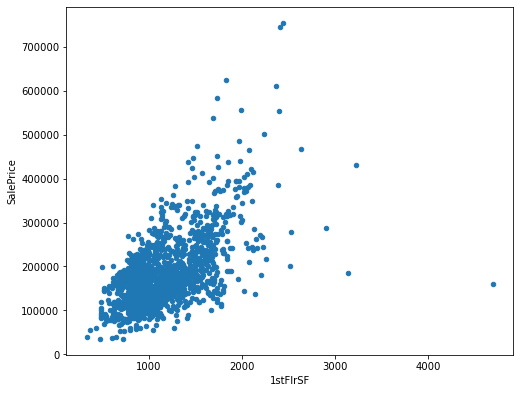

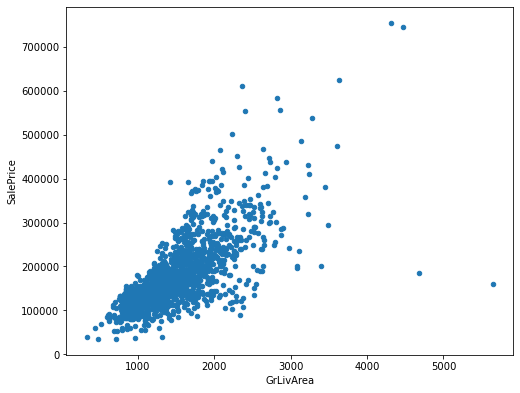

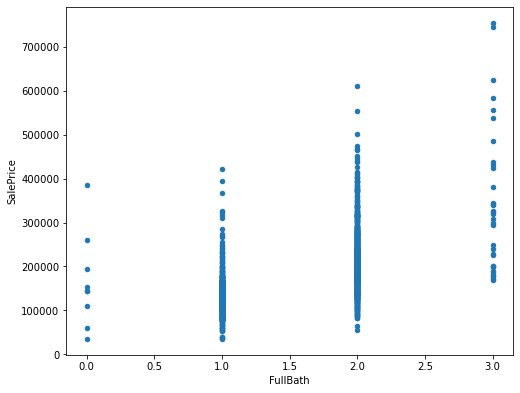

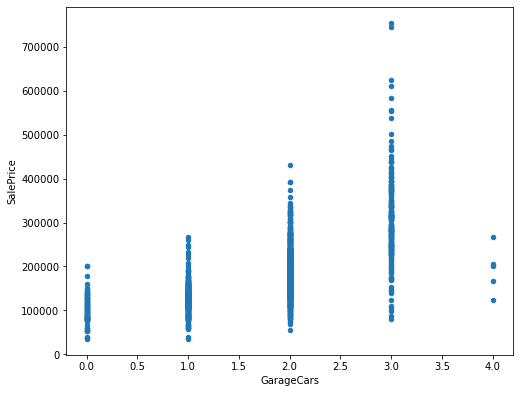

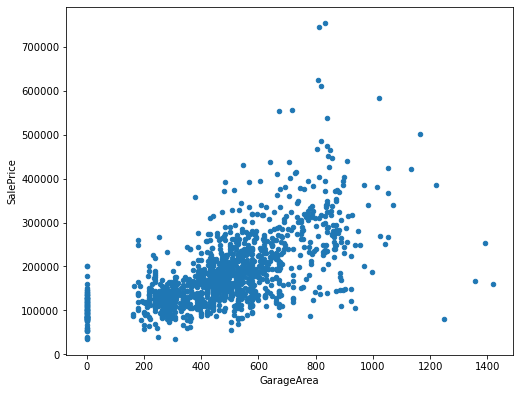

In [55]:
corr_scatter_plot()

Based on the comparison, it seems that the features chosen from the correlation heat map had a higher amount of features with a positive correlation to sales price where as the price increased the gerneral amount of the feature increased as well. Compared to the features chosen by RFE, only 4 of them had a clear positive correlation.

with the correlations I had before, it's very sensitive to other variables. WHat info is this really giving me since highly correlated to price. What this shows is it can show the weight of the house based on its features

with variables, pick all the one that can capture all facets relevant to price. SO if i populate stuff that are too common, it won't give me too much value. AKA one parameter to cover one aspect and then keep it going

Go through the link jason gave to read and learn how to detect multicolinearity 
we can run the VIF(variance inflation factor) until we get our selected features and then we can run through our models
after i look through this (VIF) compare it to my corr heat map and RFE see how the results vary and if anything sticks out

Since the RFE had less positive results than the corr heat map, lets look into seeing if there is high multicolinarity between the features using VIF

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Checking for multicolinarity within the RFE featrues using VIF
#independent variables
RFE_VIF_Check_X = RFE_features.drop(columns=['SalePrice']).fillna(0)

#VIF df
VIF_data = pd.DataFrame()
VIF_data["features"] = RFE_VIF_Check_X.columns

RFE_VIF_Check_X.isna().sum()
#Calculating VIF for each feature
VIF_data["VIF"] = [variance_inflation_factor(RFE_VIF_Check_X.values, i)
                          for i in range(len(RFE_VIF_Check_X.columns))]

print(VIF_data)

      features        VIF
0      LotArea   2.376059
1    BsmtUnfSF   3.282696
2  TotalBsmtSF  11.125718
3    GrLivArea  12.040096
4  GarageYrBlt  13.888963
5   GarageArea  11.285409
6       MoSold   5.522969


In [57]:
#checking for multicolinary within the corr heat map selected features using VIF
corr_VIF_X = df.drop(columns=['SalePrice'])

corr_VIF_data = pd.DataFrame()
corr_VIF_data['features'] = corr_VIF_X.columns

corr_VIF_data['VIF'] = [variance_inflation_factor(corr_VIF_X.values,i)
                        for i in range(len(corr_VIF_X.columns))]

print(corr_VIF_data)

      features        VIF
0  OverallQual  27.666814
1  TotalBsmtSF  22.466353
2     1stFlrSF  32.913041
3    GrLivArea  21.376954
4     FullBath  16.904480
5   GarageCars  33.403853
6   GarageArea  28.889095


Based on the VIF results, even though the corr_map features all had a more positive correlation than the ones chosen by RFE, the corr_map features all have very high VIF especially when compared to the RFE features. I might possibly have to start looking at the original data as a whole and run it through the VIF to trim down the features and from there begin selecting with RFE.

garageyrblt shouldn't even be there; its more a factor than a variable
key take away: understand the data and we don't need the sme thing over and over

next step, build my model.
start playing around with VIF to check out what features are good features to around 6 or less variables 
build two models: one with 15 and one with 6 features
we shouldnt see too much difference in accuracy

follow the multilinear regression model
do  model evaluation as well

whatever the model shows, rinse and repeat to see what's working, what's not working

have a look at what a coefficient each variable has which is the impact it has

predict with the test data to compare how the training data did

STEPS IM GOING TO TAKE
- 1)Run VIF through the dataset till we can ideally have a few features that have a low VIF for low multicolinearity
- 2)Run them through RFE, one for 15 features and one for 6 features
- 3)Run the selected features through the multilinear regression model
- 4)predict the test set and compare results to multilinear regression model to evaluate the model

STEP 1 RUNNING VIF

In [58]:
#For this step, I will still excluding the categorical features due to their low correlations
df = train.drop(columns=['SalePrice','Id'], axis=1).select_dtypes(exclude=['object']).fillna(0)

def VIF(dataFrame):
    VIF_data = pd.DataFrame()
    VIF_data["features"] = dataFrame.columns

    #Calculating VIF for each feature
    VIF_data["VIF"] = [variance_inflation_factor(dataFrame.values, i)
                            for i in range(len(dataFrame.columns))]
    return VIF_data
print(VIF(df))


         features           VIF
0      MSSubClass  4.323265e+00
1     LotFrontage  4.520093e+00
2         LotArea  2.574841e+00
3     OverallQual  6.687615e+01
4     OverallCond  4.153474e+01
5       YearBuilt  1.736552e+04
6    YearRemodAdd  2.110865e+04
7      MasVnrArea  1.857840e+00
8      BsmtFinSF1           inf
9      BsmtFinSF2           inf
10      BsmtUnfSF           inf
11    TotalBsmtSF           inf
12       1stFlrSF           inf
13       2ndFlrSF           inf
14   LowQualFinSF           inf
15      GrLivArea           inf
16   BsmtFullBath  3.708032e+00
17   BsmtHalfBath  1.217095e+00
18       FullBath  2.645091e+01
19       HalfBath  3.422082e+00
20   BedroomAbvGr  3.081602e+01
21   KitchenAbvGr  3.782147e+01
22   TotRmsAbvGrd  8.354344e+01
23     Fireplaces  3.002736e+00
24    GarageYrBlt  3.273657e+01
25     GarageCars  3.999732e+01
26     GarageArea  3.126638e+01
27     WoodDeckSF  1.894152e+00
28    OpenPorchSF  1.826517e+00
29  EnclosedPorch  1.445804e+00
30      

c:\Users\victo\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [68]:
#dropped the following:'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','MoSold'

from sqlalchemy import asc


df = train.drop(columns=['SalePrice','Id','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','MoSold'], axis=1).select_dtypes(exclude=['object']).fillna(0)

def VIF(dataFrame):
    VIF_data = pd.DataFrame()
    VIF_data["features"] = dataFrame.columns

    #Calculating VIF for each feature
    VIF_data["VIF"] = [variance_inflation_factor(dataFrame.values, i)
                            for i in range(len(dataFrame.columns))]
    return VIF_data

VIF_results = VIF(df)

print(VIF_results)

         features           VIF
0      MSSubClass      4.318100
1     LotFrontage      4.519389
2         LotArea      2.564074
3     OverallQual     65.820215
4     OverallCond     41.045545
5       YearBuilt  17267.738789
6    YearRemodAdd  20786.232666
7      MasVnrArea      1.828450
8     TotalBsmtSF     26.227188
9        1stFlrSF    742.082004
10       2ndFlrSF    149.207314
11      GrLivArea   1219.032307
12   BsmtFullBath      2.194968
13   BsmtHalfBath      1.141011
14       FullBath     26.445457
15       HalfBath      3.403347
16   BedroomAbvGr     30.528894
17   KitchenAbvGr     37.643621
18   TotRmsAbvGrd     83.013058
19     Fireplaces      2.992869
20    GarageYrBlt     32.584476
21     GarageCars     39.706865
22     GarageArea     31.116452
23     WoodDeckSF      1.888431
24    OpenPorchSF      1.817828
25  EnclosedPorch      1.439785
26      3SsnPorch      1.033013
27    ScreenPorch      1.182488
28       PoolArea      1.088691
29        MiscVal      1.035080
30      

OverallCond YearBuilt 2ndFlrSF

In [69]:
df = df.drop(columns=['OverallCond','YearBuilt','2ndFlrSF','YearRemodAdd','YrSold']).select_dtypes(exclude=['object'])

def VIF(dataFrame):
    VIF_data = pd.DataFrame()
    VIF_data["features"] = dataFrame.columns

    #Calculating VIF for each feature
    VIF_data["VIF"] = [variance_inflation_factor(dataFrame.values, i)
                            for i in range(len(dataFrame.columns))]
    return VIF_data

VIF_results = VIF(df)

print(VIF_results[VIF_results['VIF']>=5])
print(VIF_results)

        features        VIF
3    OverallQual  40.919079
5    TotalBsmtSF  25.725654
6       1stFlrSF  49.524960
7      GrLivArea  62.299976
10      FullBath  20.811150
12  BedroomAbvGr  27.799990
13  KitchenAbvGr  27.212815
14  TotRmsAbvGrd  81.990579
16   GarageYrBlt  23.712742
17    GarageCars  37.103433
18    GarageArea  30.979649
         features        VIF
0      MSSubClass   4.266867
1     LotFrontage   4.472424
2         LotArea   2.531326
3     OverallQual  40.919079
4      MasVnrArea   1.764221
5     TotalBsmtSF  25.725654
6        1stFlrSF  49.524960
7       GrLivArea  62.299976
8    BsmtFullBath   2.123592
9    BsmtHalfBath   1.121513
10       FullBath  20.811150
11       HalfBath   2.913156
12   BedroomAbvGr  27.799990
13   KitchenAbvGr  27.212815
14   TotRmsAbvGrd  81.990579
15     Fireplaces   2.917032
16    GarageYrBlt  23.712742
17     GarageCars  37.103433
18     GarageArea  30.979649
19     WoodDeckSF   1.873232
20    OpenPorchSF   1.811057
21  EnclosedPorch   1.2591

In [70]:
VIF_over_5 = VIF_results[VIF_results['VIF']>=5]
df.drop(columns=VIF_over_5['features'], inplace=True)

VIF_results = df

print(VIF_results.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   MasVnrArea     1460 non-null   float64
 4   BsmtFullBath   1460 non-null   int64  
 5   BsmtHalfBath   1460 non-null   int64  
 6   HalfBath       1460 non-null   int64  
 7   Fireplaces     1460 non-null   int64  
 8   WoodDeckSF     1460 non-null   int64  
 9   OpenPorchSF    1460 non-null   int64  
 10  EnclosedPorch  1460 non-null   int64  
 11  3SsnPorch      1460 non-null   int64  
 12  ScreenPorch    1460 non-null   int64  
 13  PoolArea       1460 non-null   int64  
 14  MiscVal        1460 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 171.2 KB
None


In [73]:
x = VIF_results

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=15)
rfe.fit(x,y)

for i, col in zip(range(x.shape[1]), x.columns):
    if rfe.support_[i] != False:
        print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")
temp = pd.Series(rfe.support_,index = x.columns)
selected_features_rfe = temp[temp==True].index

MSSubClass selected=True rank=1
LotFrontage selected=True rank=1
LotArea selected=True rank=1
MasVnrArea selected=True rank=1
BsmtFullBath selected=True rank=1
BsmtHalfBath selected=True rank=1
HalfBath selected=True rank=1
Fireplaces selected=True rank=1
WoodDeckSF selected=True rank=1
OpenPorchSF selected=True rank=1
EnclosedPorch selected=True rank=1
3SsnPorch selected=True rank=1
ScreenPorch selected=True rank=1
PoolArea selected=True rank=1
MiscVal selected=True rank=1


Running the selected features chosen thanks to results of the VIF through RFE

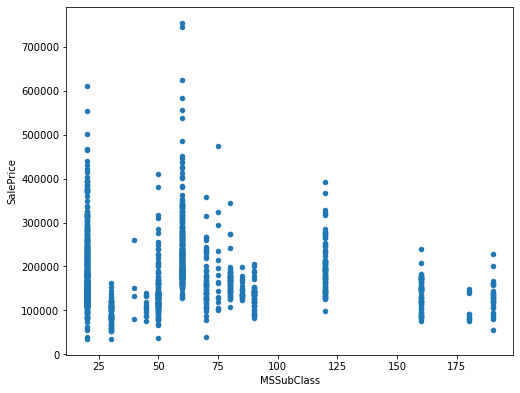

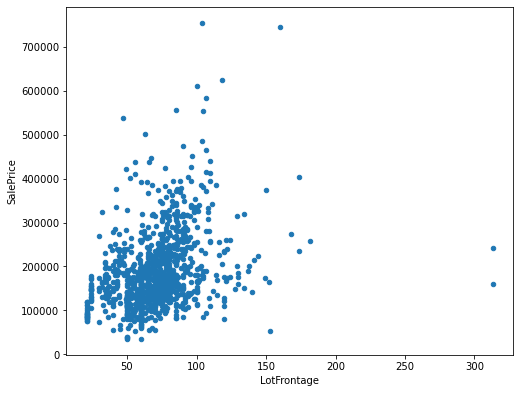

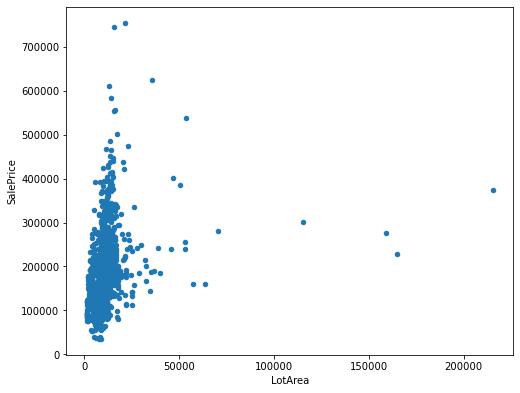

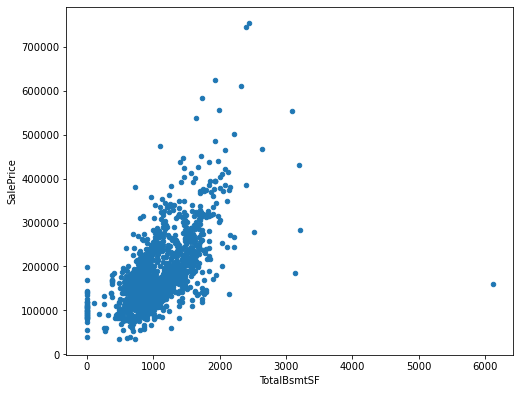

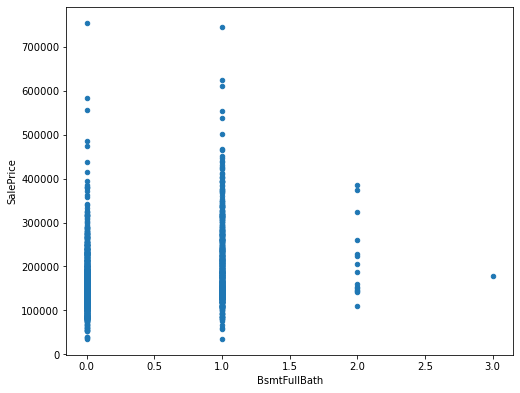

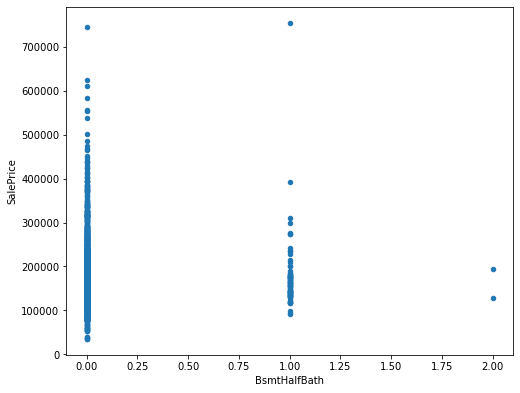

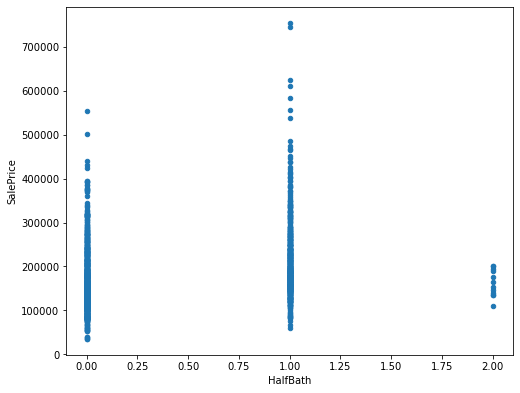

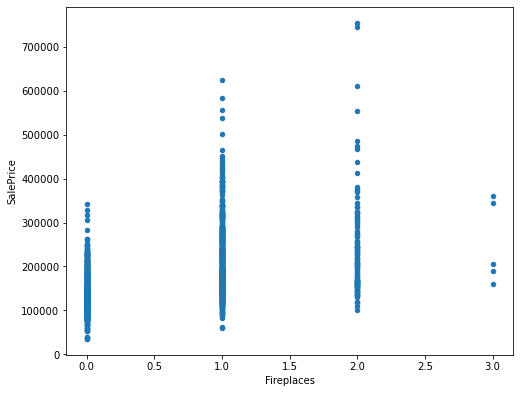

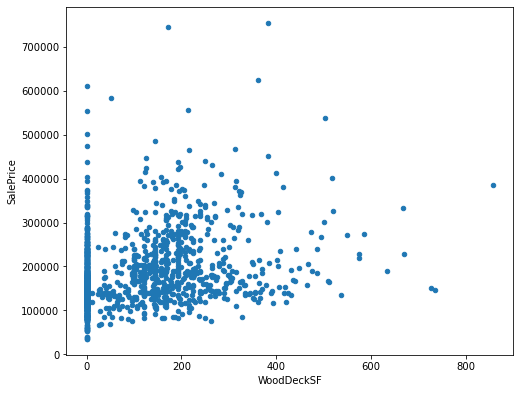

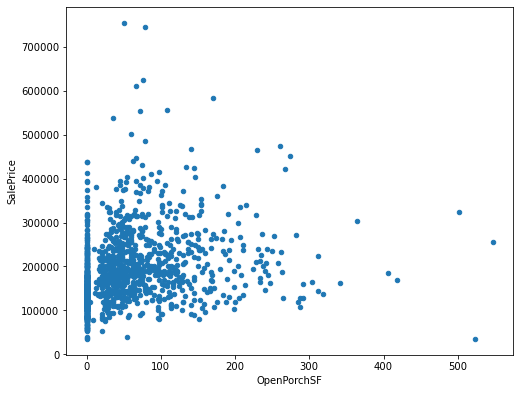

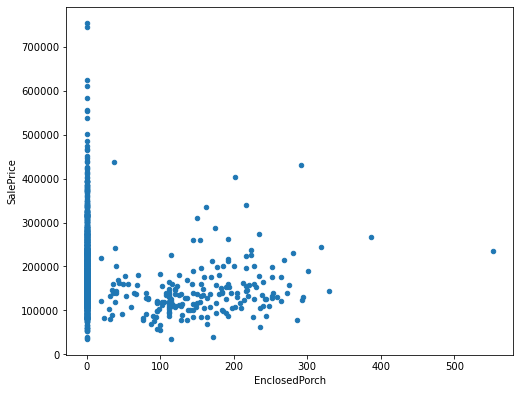

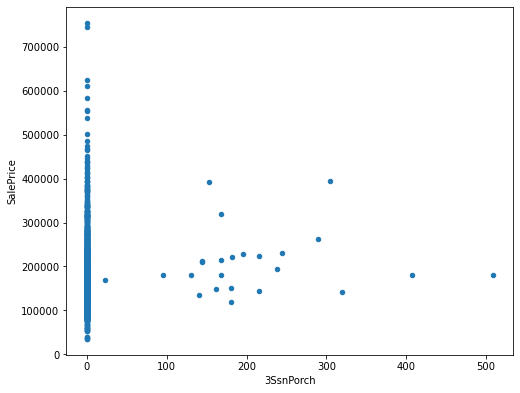

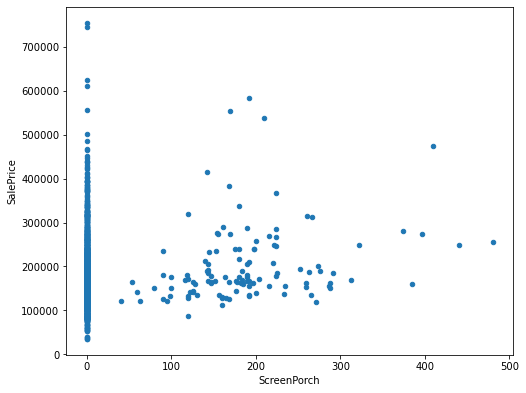

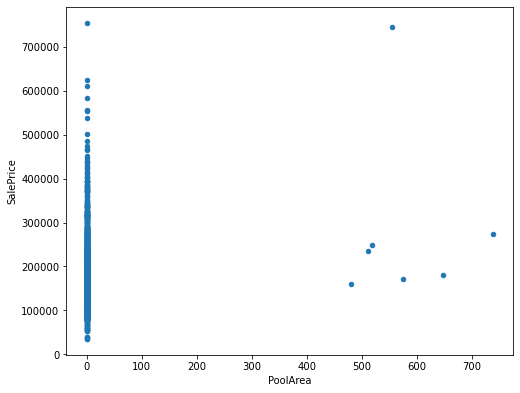

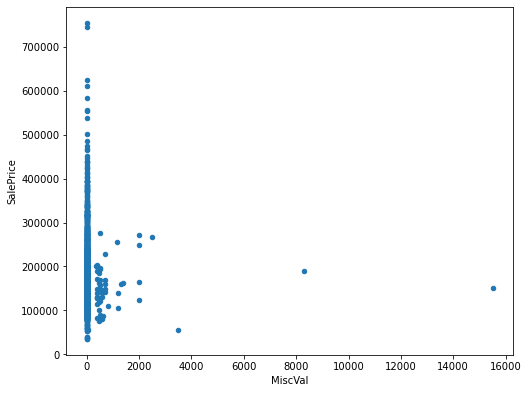

In [87]:
RFE_features = train[['SalePrice','MSSubClass','LotFrontage', 'LotArea', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
       'HalfBath', 'Fireplaces','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']]

#RFE chosen features
def RFE_scatter_plot(): 
       for i in RFE_features:
              if i != 'SalePrice':
                     RFE_features.plot.scatter(x=i,y='SalePrice')

RFE_scatter_plot()

Running RFE selected features through multi-linear regression model

In [103]:
x = train[['MSSubClass','LotFrontage', 'LotArea', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
       'HalfBath', 'Fireplaces','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']]
y = train['SalePrice']
x.fillna(value=0,inplace=True)
print(x.shape,y.shape)

(1460, 15) (1460,)


c:\Users\victo\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


(1460, 15) (1460,)


ValueError: x and y must be the same size

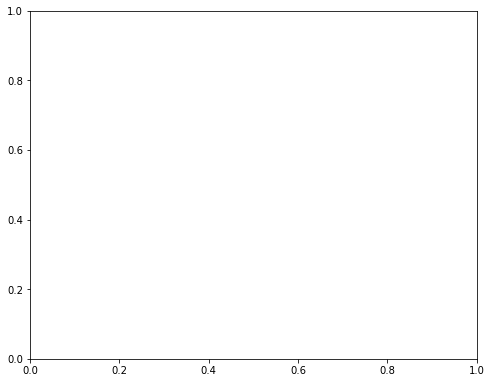

In [105]:
regressor.fit(x,y)
print(x.shape,y.shape)

plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.show()